In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", 
                 index_col = ["date", "iso_code"], 
                 parse_dates = True)
df.rename(columns = {col:col.replace("_", " ").title() for col in df}, 
                     inplace = True)
countries = df.groupby("iso_code").mean().index

countries2 = df.groupby(["iso_code", "Location"]).mean().index
iso_to_country = dict(countries2)

In [2]:
keys = list(df.keys())[4:]
keys.remove("Tests Units")


In [3]:
df

Continent     Location  Total Cases  New Cases  \
date       iso_code                                                  
2020-02-24 AFG           Asia  Afghanistan          5.0        5.0   
2020-02-25 AFG           Asia  Afghanistan          5.0        0.0   
2020-02-26 AFG           Asia  Afghanistan          5.0        0.0   
2020-02-27 AFG           Asia  Afghanistan          5.0        0.0   
2020-02-28 AFG           Asia  Afghanistan          5.0        0.0   
...                       ...          ...          ...        ...   
2022-01-31 ZWE         Africa     Zimbabwe     229666.0      206.0   
2022-02-01 ZWE         Africa     Zimbabwe     229851.0      185.0   
2022-02-02 ZWE         Africa     Zimbabwe     230012.0      161.0   
2022-02-03 ZWE         Africa     Zimbabwe     230170.0      158.0   
2022-02-04 ZWE         Africa     Zimbabwe     230170.0        NaN   

                     New Cases Smoothed  Total Deaths  New Deaths  \
date       iso_code                                                 
2020-02-24 AFG                      NaN           NaN         NaN   
2020-02-25 AFG                      NaN           NaN         NaN   
2020-02-26 AFG                      NaN           NaN         NaN   
2020-02-27 AFG                      NaN           NaN         NaN   
2020-02-28 AFG                      NaN           NaN         NaN   
...                                 ...           ...         ...   
2022-01-31 ZWE                  160.714        5338.0         1.0   
2022-02-01 ZWE                  153.571        5350.0        12.0   
2022-02-02 ZWE                  152.714        5352.0         2.0   
2022-02-03 ZWE                  153.429        5357.0         5.0   
2022-02-04 ZWE                      NaN        5357.0         0.0   

                     New Deaths Smoothed  Total Cases Per Million  \
date       iso_code                                                 
2020-02-24 AFG                       NaN                    0.126   
2020-02-25 AFG                       NaN                    0.126   
2020-02-26 AFG                       NaN                    0.126   
2020-02-27 AFG                       NaN                    0.126   
2020-02-28 AFG                       NaN                    0.126   
...                                  ...                      ...   
2022-01-31 ZWE                     4.714                15217.559   
2022-02-01 ZWE                     4.857                15229.817   
2022-02-02 ZWE                     4.429                15240.485   
2022-02-03 ZWE                     4.714                15250.954   
2022-02-04 ZWE                     3.429                15250.954   

                     New Cases Per Million  ...  Female Smokers  Male Smokers  \
date       iso_code                         ...                                 
2020-02-24 AFG                       0.126  ...             NaN           NaN   
2020-02-25 AFG                       0.000  ...             NaN           NaN   
2020-02-26 AFG                       0.000  ...             NaN           NaN   
2020-02-27 AFG                       0.000  ...             NaN           NaN   
2020-02-28 AFG                       0.000  ...             NaN           NaN   
...                                    ...  ...             ...           ...   
2022-01-31 ZWE                      13.649  ...             1.6          30.7   
2022-02-01 ZWE                      12.258  ...             1.6          30.7   
2022-02-02 ZWE                      10.668  ...             1.6          30.7   
2022-02-03 ZWE                      10.469  ...             1.6          30.7   
2022-02-04 ZWE                         NaN  ...             1.6          30.7   

                     Handwashing Facilities  Hospital Beds Per Thousand  \
date       iso_code                                                       
2020-02-24 AFG                       37.746                         0.5   
2020-02-25 AFG                    

In [4]:
pivot_df = {}
for key in keys:
    pivot_df[key] = pd.pivot_table(df.reset_index(), 
                                   values=[key],
                                   index=['date'],
                                   columns=['iso_code'])
    pivot_df[key] = pivot_df[key].T.reset_index().set_index("iso_code")
    drop_key = list(pivot_df.keys())[0]
    del pivot_df[key]["level_0"]
    pivot_df[key] = pivot_df[key].T 
    

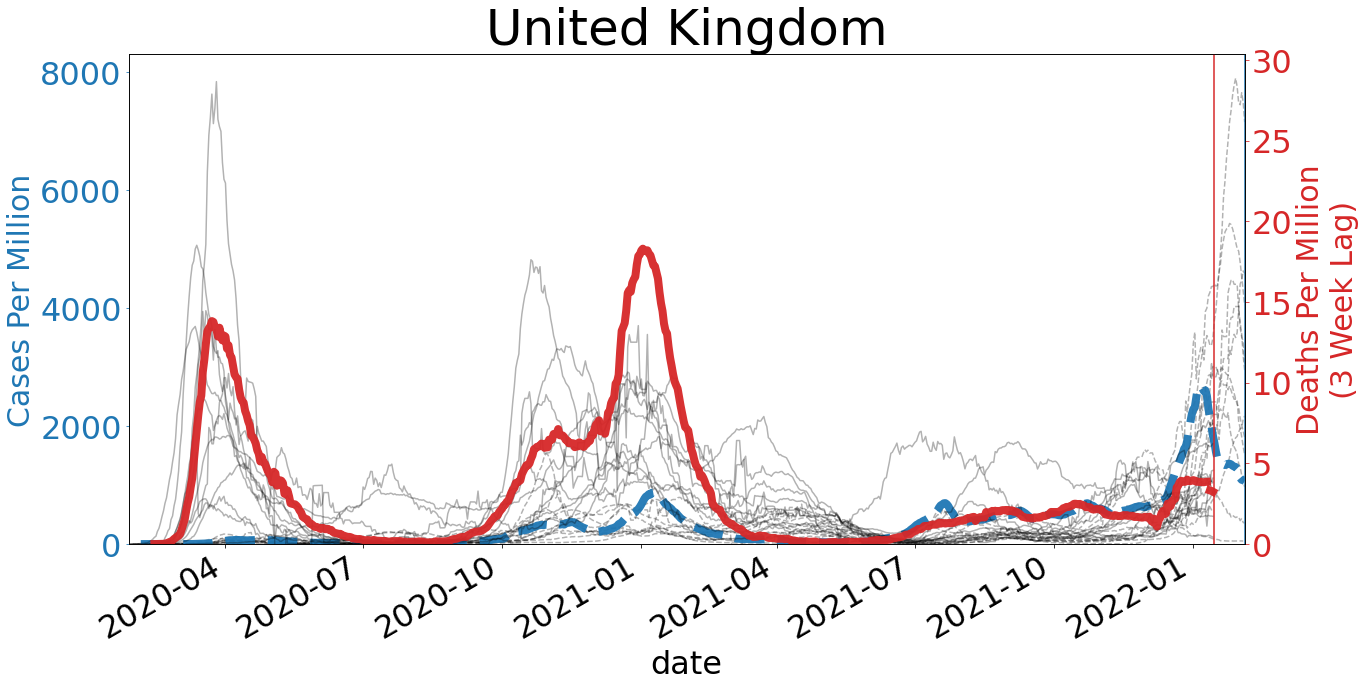

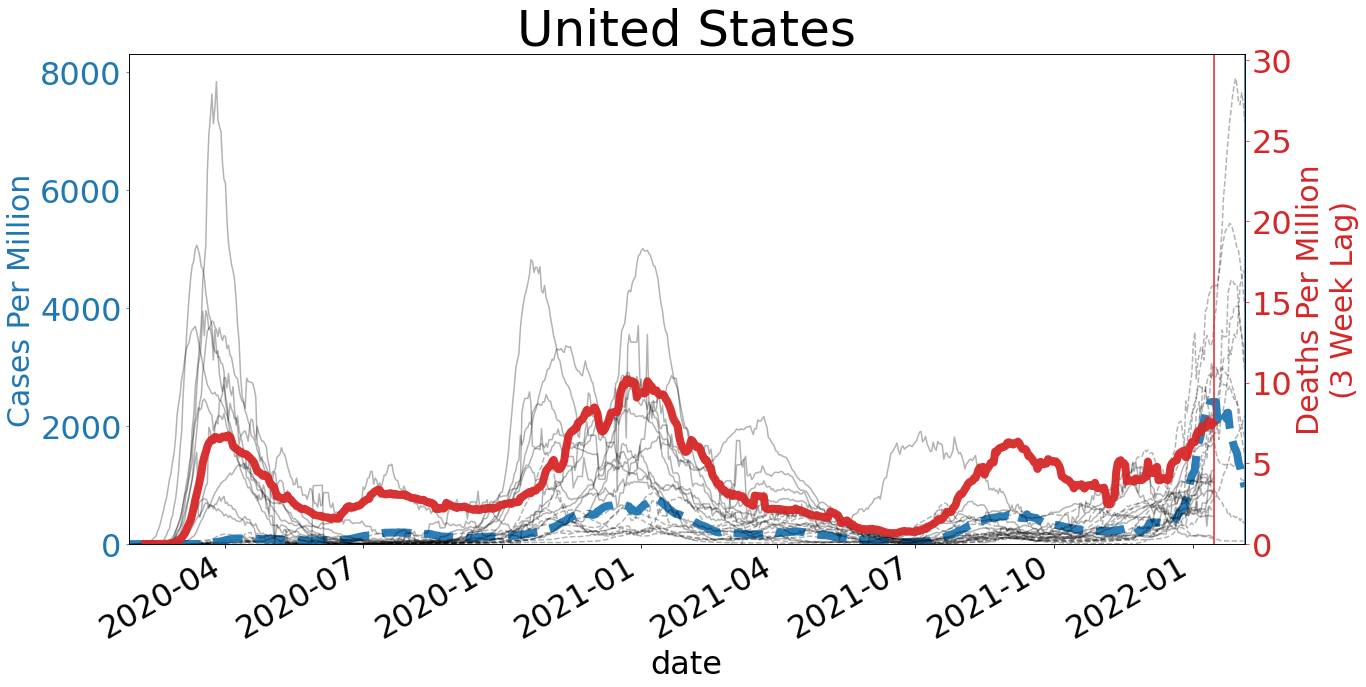

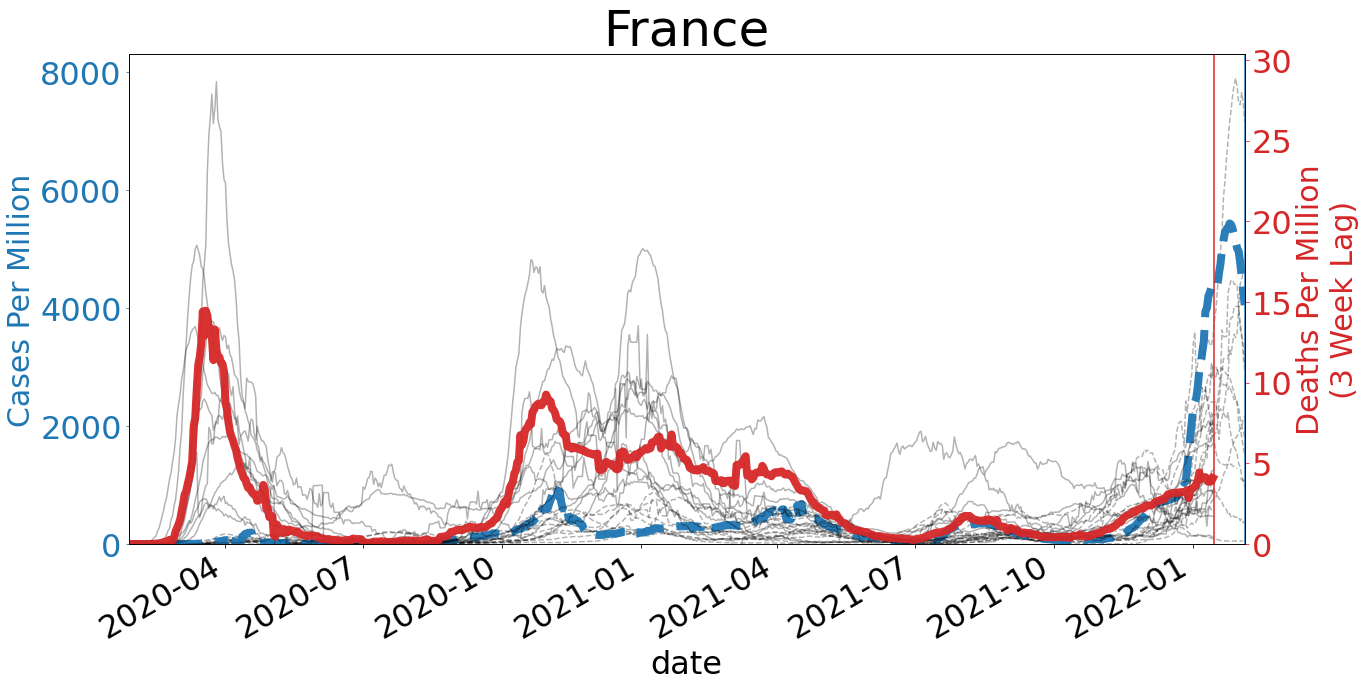

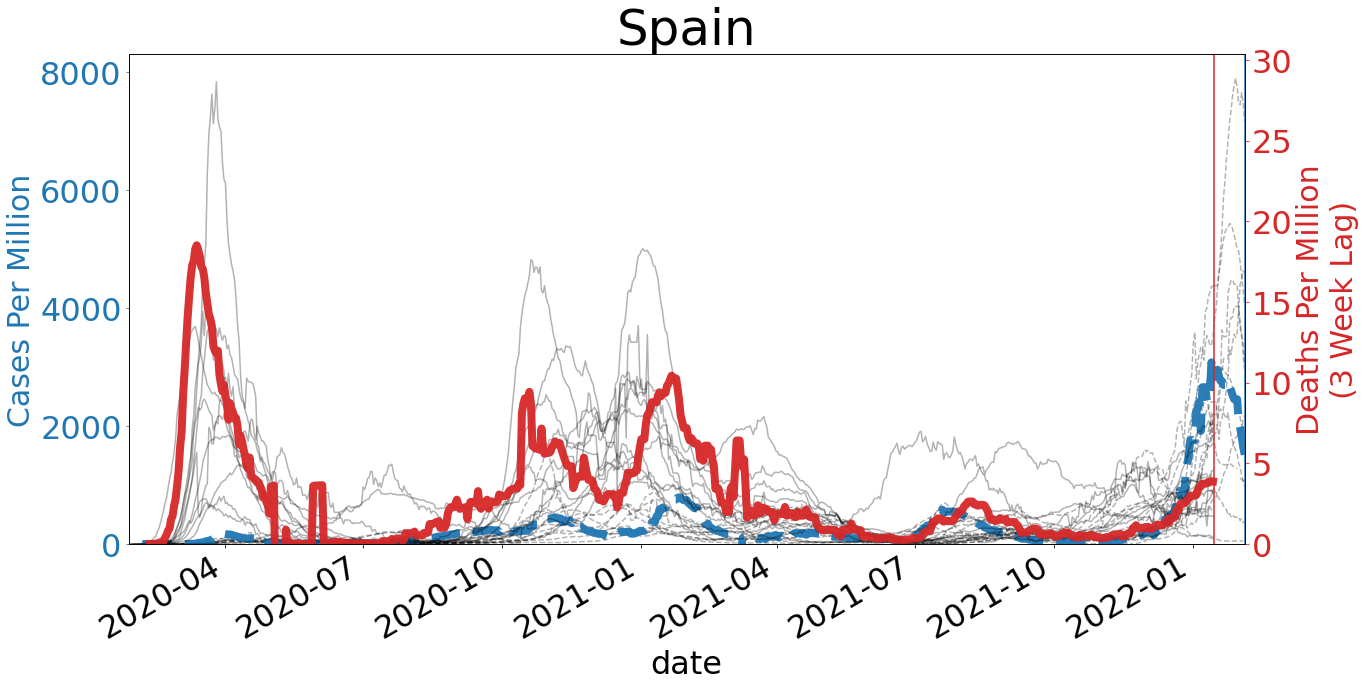

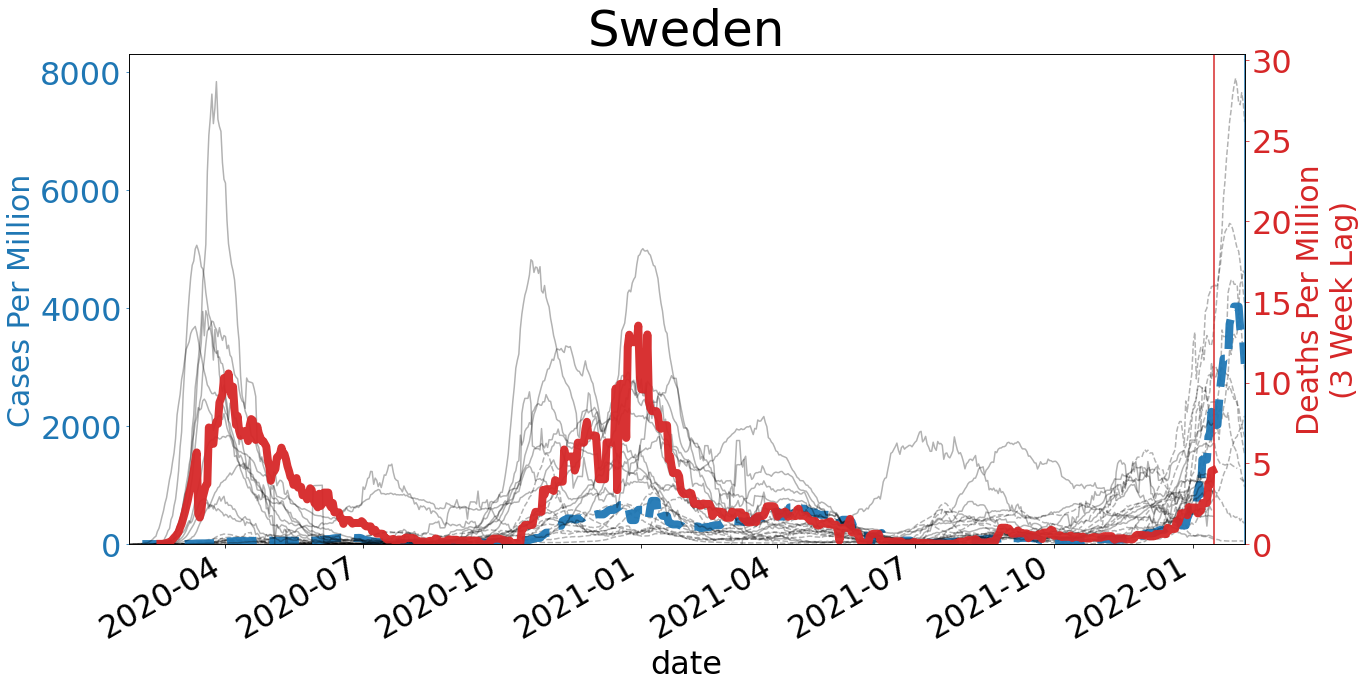

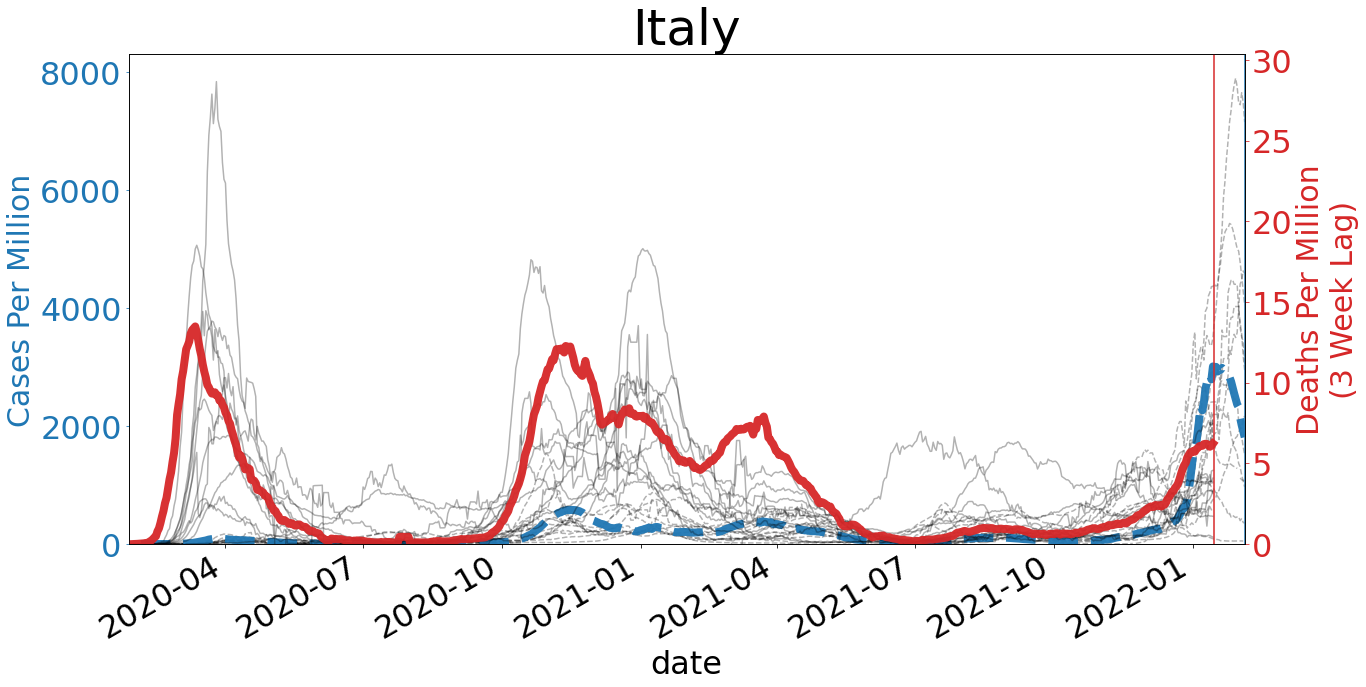

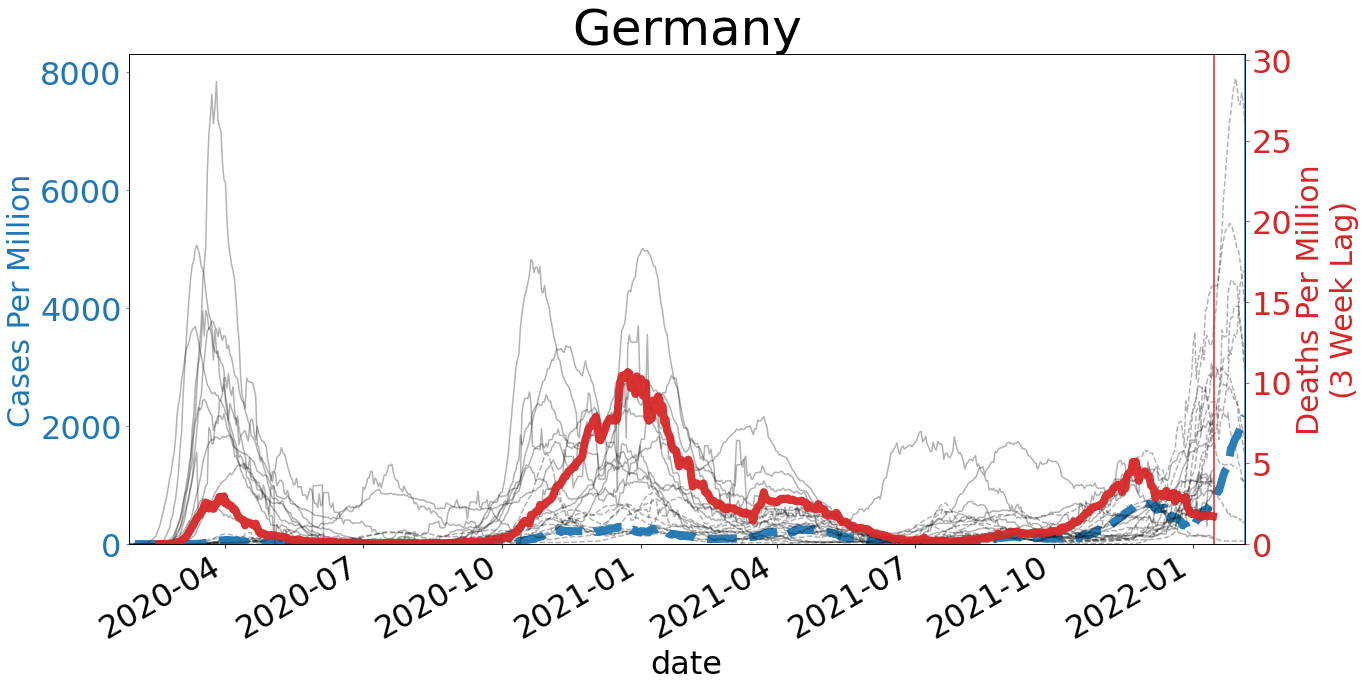

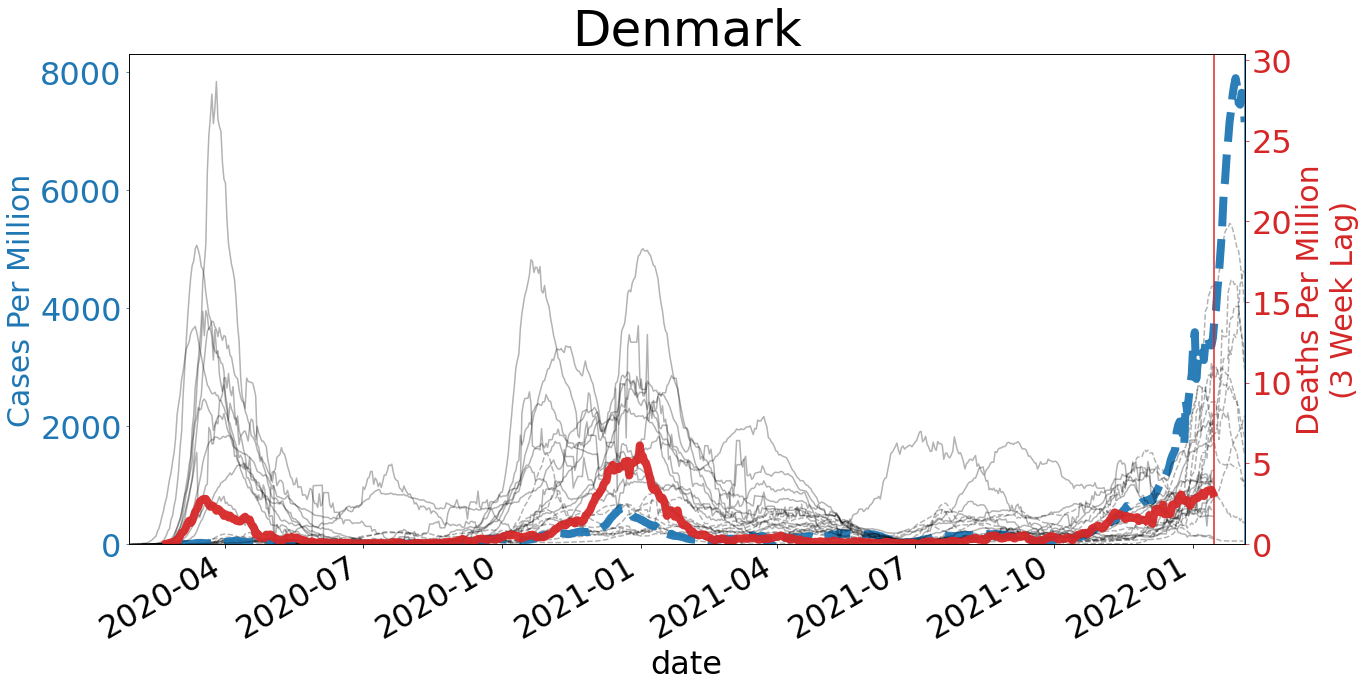

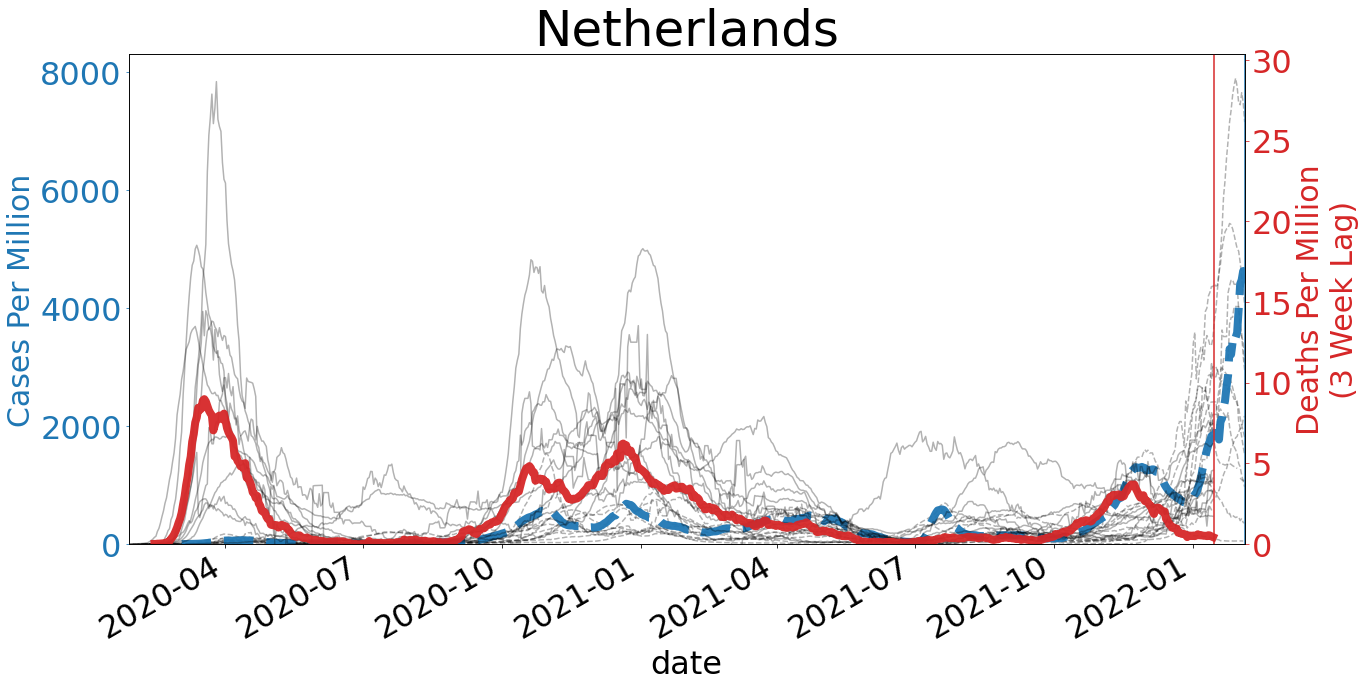

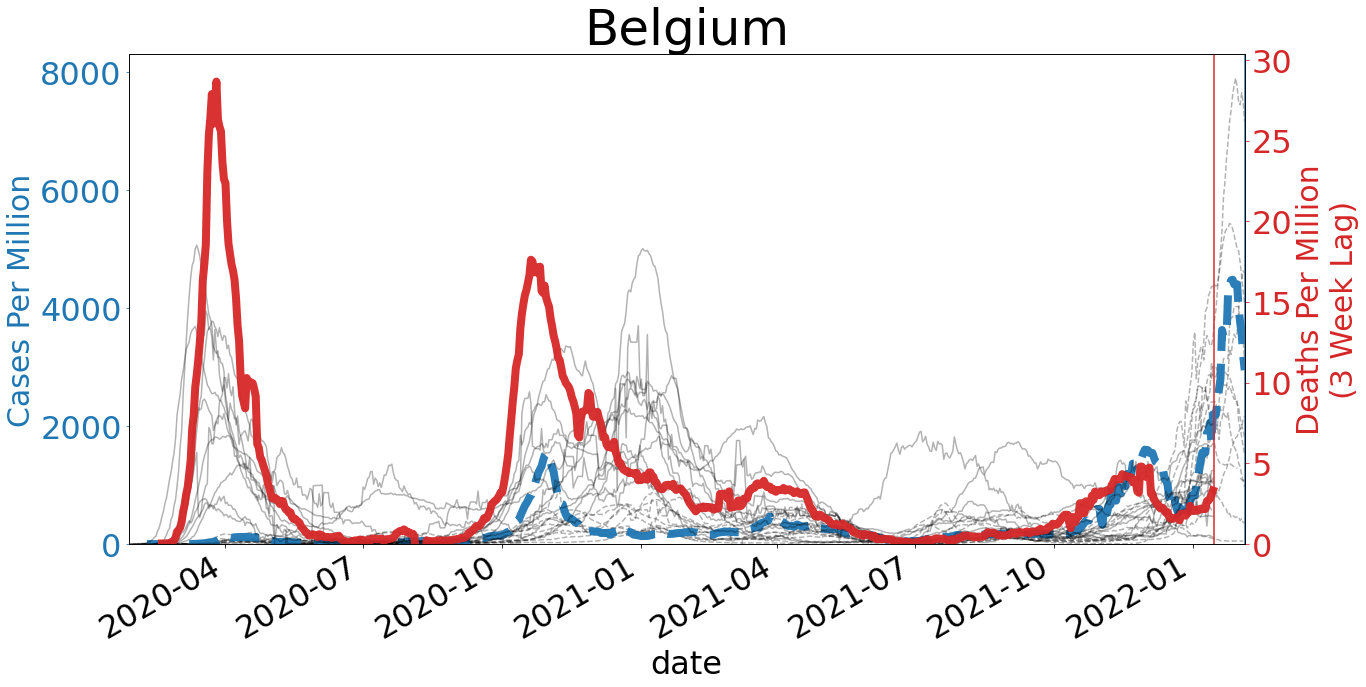

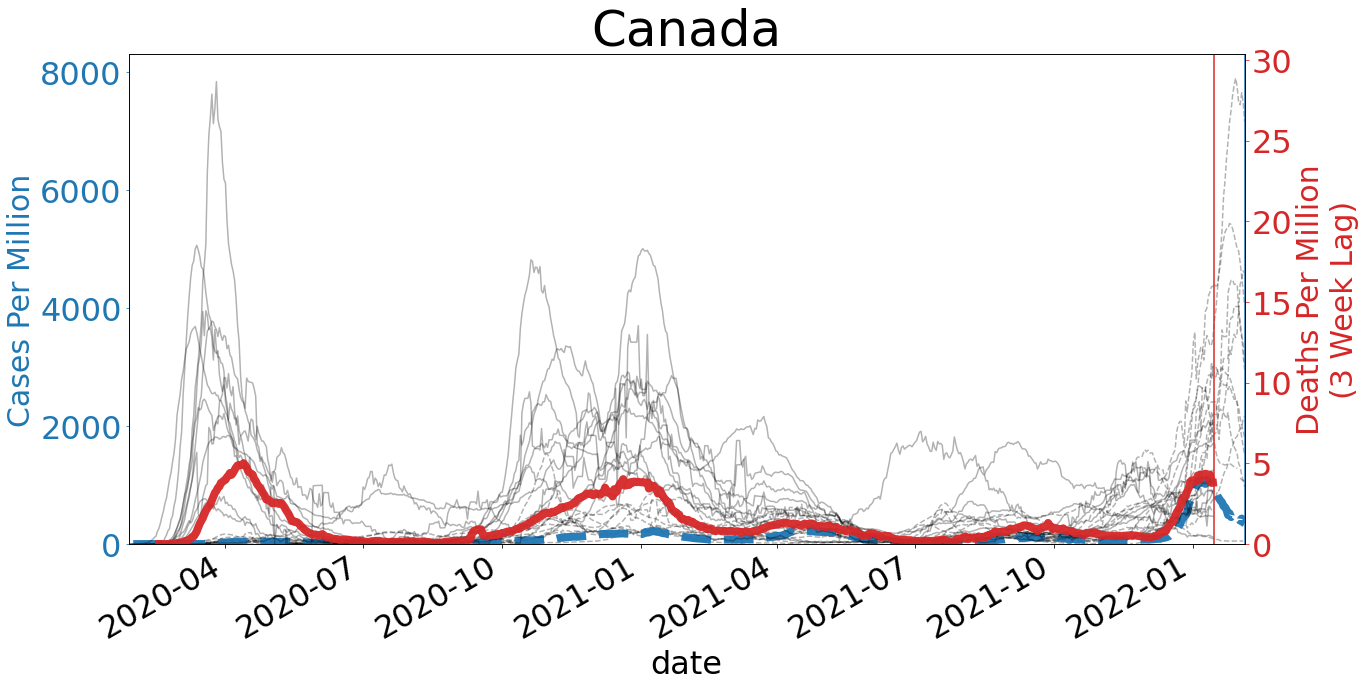

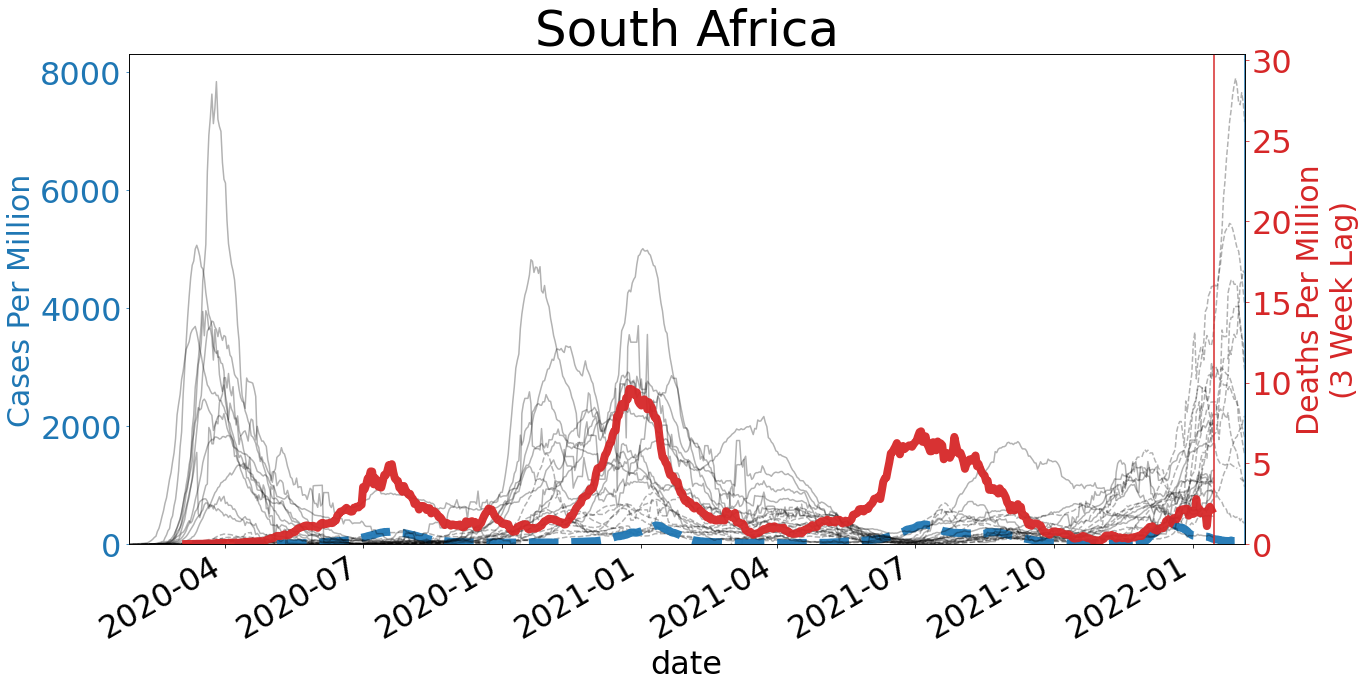

In [5]:
import copy
plt.rcParams.update({'font.size': 32})

plot_df = copy.copy(pivot_df)
plot_df["New Deaths Smoothed Per Million"] = plot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]

for country in plot_countries:
    fig, ax = plt.subplots(figsize = (20, 10))
    ax.set_title(iso_to_country[country], fontsize = 50)
    ax2 = ax.twinx()
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
        other_countries = [c for c in plot_countries if c != country]
        plot_df[var_name][other_countries].plot.line(
            color = "k",
            alpha = .3,
            ls = ls,
            ax = a,
            legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 8,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)        
    a.axvline(plot_df[var_name][country].index[-1])
    a.axvline(plot_df[var_name][country].index[-21], color = "C3")
    a.set_xmargin(0)
    plt.show()

In [6]:
for iso, country in iso_to_country.items():
    print(country)

Aruba
Afghanistan
Angola
Anguilla
Albania
Andorra
United Arab Emirates
Argentina
Armenia
Antigua and Barbuda
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Bonaire Sint Eustatius and Saba
Burkina Faso
Bangladesh
Bulgaria
Bahrain
Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bermuda
Bolivia
Brazil
Barbados
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Cote d'Ivoire
Cameroon
Democratic Republic of Congo
Congo
Cook Islands
Colombia
Comoros
Cape Verde
Costa Rica
Cuba
Curacao
Cayman Islands
Cyprus
Czechia
Germany
Djibouti
Dominica
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Faeroe Islands
Micronesia (country)
Gabon
United Kingdom
Georgia
Guernsey
Ghana
Gibraltar
Guinea
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Grenada
Greenland
Guatemala
Guyana
Hong Kong
Honduras
Croatia
Haiti
Hungary
Indonesia
Isle of Man
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jersey
Jordan
Japan


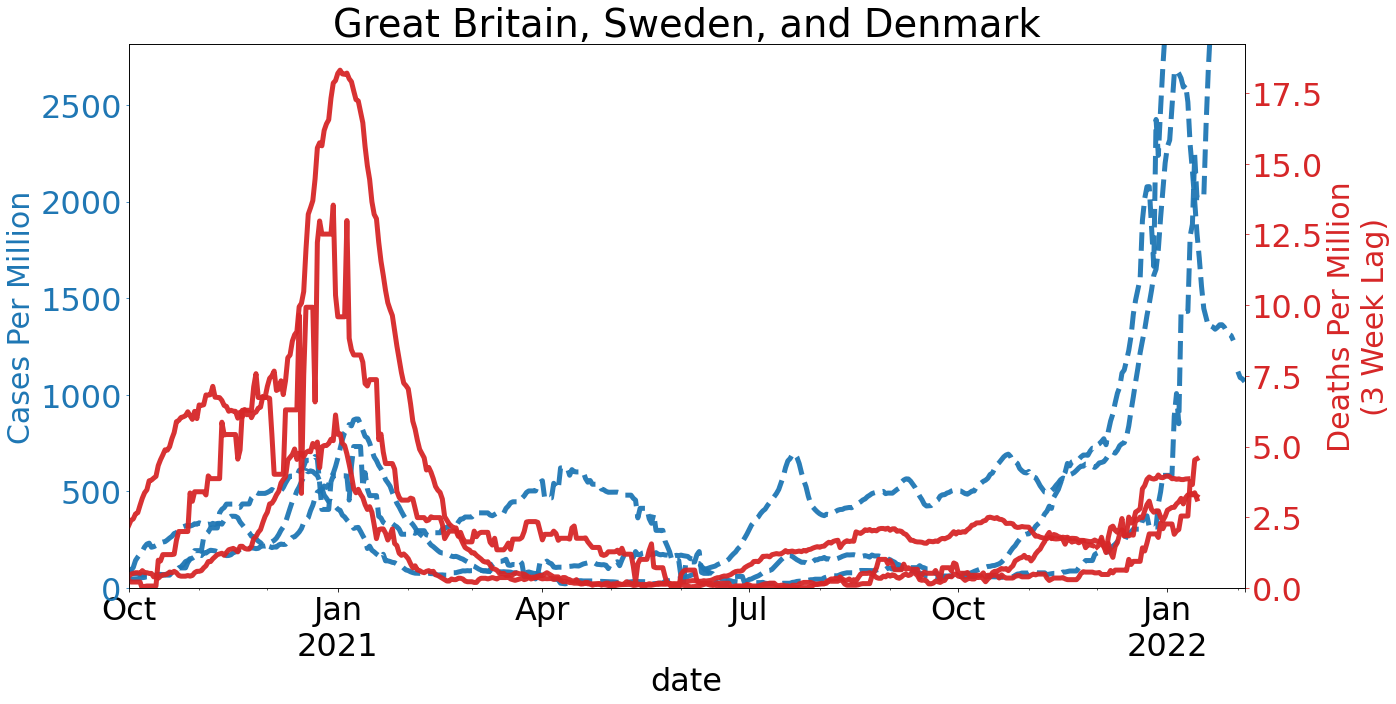

In [7]:
plot_countries = ["GBR", "SWE", "DNK"]

fig, ax = plt.subplots(figsize = (20, 10))
ax2 = ax.twinx()
for country in plot_countries:
#     ax.set_title(iso_to_country[country], fontsize = 50)
    for name in ["Cases", "Deaths"]:
        ls = "--" if name == "Cases" else "-"
        
        if name == "Deaths":
            a = ax2
        else:
            a = ax
        var_name = "New " + name + " Smoothed Per Million"
#         other_countries = [c for c in plot_countries if c != country]
#         plot_df[var_name][other_countries].plot.line(
#             color = "k",
#             alpha = .3,
#             ls = ls,
#             ax = a,
#             legend = False)
        
    for name in ["Cases", "Deaths"]:
        var_name = "New " + name + " Smoothed Per Million"
        if name == "Deaths":
            a = ax2
            color = "C3"
            lag = "\n(3 Week Lag)"
        else:
            a = ax
            color = "C0"
            lag = ""
        ls = "--" if name == "Cases" else "-"
        plot_df[var_name][country].loc["2020-10-01":].plot.line(
            ls = ls,
            ax=a,
            color = color,
            lw = 5,
            alpha = .95,
            legend = False)
        a.set_ylim(bottom = 0)
        a.set_ylabel(name + " Per Million" + lag, 
                     color = color,
                    fontsize = 30)
        a.tick_params(axis='y', colors=color)
        ax.set_xmargin(0)

ax.set_title("Great Britain, Sweden, and Denmark")
plt.show()

In [8]:
# plot_df["IRF"] = plot_df["New Deaths Smoothed Per Million"].div()
plot_df = copy.copy(pivot_df)
plot_df["IRF"] = pivot_df["New Deaths Smoothed Per Million"].copy()
pivot_df["New Deaths Smoothed Per Million"] = pivot_df["New Deaths Smoothed Per Million"].shift(-21)
plot_countries = ["GBR", "USA", "FRA", "ESP", "SWE", "ITA", "DEU","DNK", "NLD", "BEL", "CAN", "ZAF"]
for key in plot_df["New Deaths Smoothed Per Million"]:
    plot_df["IRF"][key] = plot_df["New Deaths Smoothed Per Million"][key].div(plot_df["New Cases Smoothed Per Million"][key])




(0.0, 0.12248835222147156)

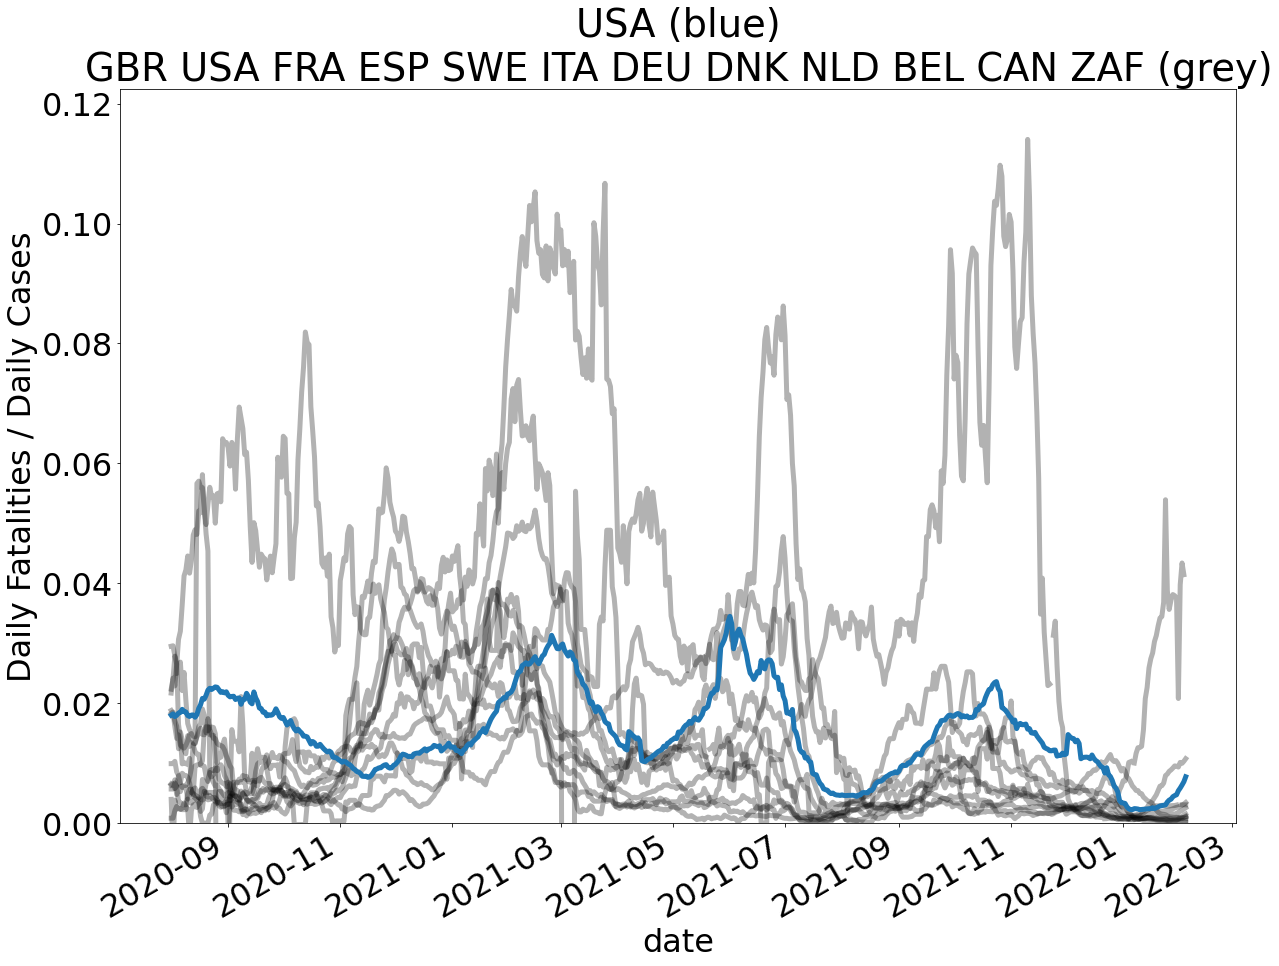

In [9]:
import datetime
fig, ax = plt.subplots(figsize =(20,15))
country = "USA"
other_countries = [c for c in plot_countries if c != country]
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,other_countries].plot.line(
    color = "k",
    alpha = .3,
    linewidth = 5,
    ax = ax,
    legend = False)
plot_df["IRF"].loc[datetime.datetime(2020,8,1):,"USA"].plot(ax = ax, legend =  False,    linewidth = 5)
plt.title("USA (blue)\nGBR USA FRA ESP SWE ITA DEU DNK NLD BEL CAN ZAF (grey)")
ax.set_ylabel("Daily Fatalities / Daily Cases")
ax.set_ylim(0)
# other_countries = [c for c in plot_countries if c != country]
# plot_df[var_name][other_countries].plot.line(
#     color = "k",
#     alpha = .3,
#     ls = ls,
#     ax = a,
#     legend = False)

In [10]:
import datetime
plot_df["IRF"][datetime.datetime(2020,6,1):]

iso_code         ABW       AFG       AGO       AIA       ALB       AND  \
date                                                                     
2020-06-01       NaN  0.009882  0.000000       NaN  0.007234  0.000000   
2020-06-02       NaN  0.010709  0.000000       NaN  0.000000  0.000000   
2020-06-03       NaN  0.013920  0.000000       NaN  0.000000  0.000000   
2020-06-04       NaN  0.013156  0.000000       NaN  0.000000  0.000000   
2020-06-05       NaN  0.011868  0.000000       NaN  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2022-01-31  0.000000  0.006902  0.008076  0.007299  0.003915  0.000341   
2022-02-01  0.000000  0.006079  0.006389  0.010989  0.003512  0.000000   
2022-02-02  0.000000  0.004863  0.006785  0.010989  0.004402  0.000777   
2022-02-03  0.002075  0.004569  0.007386  0.008772  0.004501  0.001387   
2022-02-04  0.002305  0.003955  0.009931  0.000000  0.004642  0.001918   

iso_code         ARE       ARG       ARM       ATG  ...       VCT       VEN  \
date                                                ...                       
2020-06-01  0.003679  0.018606  0.021860  0.000000  ...       NaN  0.014499   
2020-06-02  0.003406  0.016680  0.025702  0.000000  ...       NaN  0.011566   
2020-06-03  0.003409  0.015558  0.026179  0.000000  ...       NaN  0.012788   
2020-06-04  0.003336  0.018184  0.020964  0.000000  ...       NaN  0.011867   
2020-06-05  0.003128  0.019945  0.020056  0.000000  ...       NaN  0.007778   
...              ...       ...       ...       ...  ...       ...       ...   
2022-01-31  0.001434  0.004176  0.001623  0.008278  ...  0.001609  0.002559   
2022-02-01  0.001471  0.004686  0.001396  0.008278  ...  0.001579  0.002535   
2022-02-02  0.001429  0.005294  0.001406  0.003448  ... -0.002075  0.002766   
2022-02-03  0.001337  0.005853  0.001425       NaN  ... -0.001990  0.003145   
2022-02-04  0.001571  0.006280  0.001843       NaN  ... -0.001417  0.003220   

iso_code         VGB       VNM  VUT  WLF       YEM       ZAF       ZMB  \
date                                                                     
2020-06-01       NaN       NaN  NaN  NaN  0.329806  0.020855  0.000000   
2020-06-02       NaN       NaN  NaN  NaN  0.253201  0.020017  0.000000   
2020-06-03       NaN       NaN  NaN  NaN  0.256510  0.020710  0.000000   
2020-06-04       NaN       NaN  NaN  NaN  0.263415  0.020247  0.000000   
2020-06-05       NaN       NaN  NaN  NaN  0.247991  0.020935  0.000000   
...              ...       ...  ...  ...       ...       ...       ...   
2022-01-31  0.008849  0.007448  NaN  NaN  0.039351  0.020780  0.005428   
2022-02-01  0.000000  0.006656  NaN  NaN  0.037668  0.039744  0.005009   
2022-02-02  0.000000  0.005669  NaN  NaN  0.051170  0.043380  0.005557   
2022-02-03  0.016806  0.007649  NaN  NaN  0.058140  0.041434  0.007681   
2022-02-04  0.022471  0.007326  NaN  NaN  0.078864       NaN  0.007431   

iso_code         ZWE  
date                  
2020-06-01  0.000000  
2020-06-02  0.000000  
2020-06-03  0.000000  
2020-06-04  0.000000  
2020-06-05  0.000000  
...              ...  
2022-01-31  0.029299  
2022-02-01  0.031643  
2022-02-02  0.028955  
2022-02-03  0.030691  
2022-02-04       NaN  

[614 rows x 216 columns]